In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.dates as mdates
import plotly.express as px
import scipy
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
dates = pd.date_range(start="2019-12-25",end="2020-03-25").tolist()
for i, date in enumerate(dates):
    dates[i] = date.strftime("%Y-%m-%d")

## Number of Tweets by City

In [19]:
df = pd.read_csv('../data/news.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
df

# Get counts per data
counts = pd.to_datetime(df['date_published']).dt.date.value_counts()
raw_indexes = counts.index
indexes = []

# Convert date indexes into strings
for i, index in enumerate(raw_indexes):
    indexes.append(index.strftime("%Y-%m-%d"))

final_counts = []

# Gather number of articles for each date
for date in dates:
    if date in final_indexes:
        index = indexes.index(date)
        final_counts.append(counts[index])
    else:
        final_counts.append(0)

for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%Y-%m-%d').date()

NameError: name 'final_indexes' is not defined

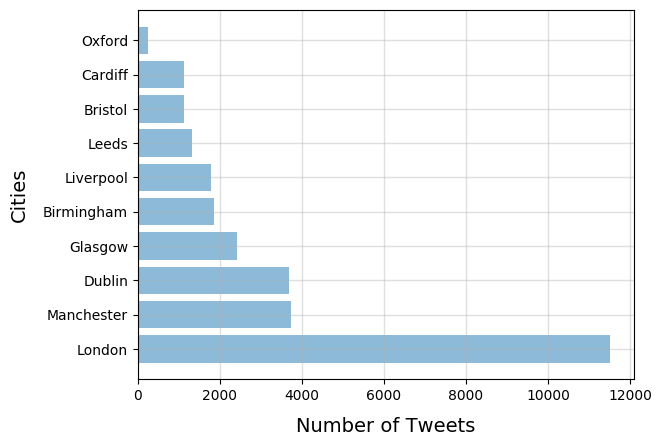

In [29]:
cities = ['London', 'Manchester', 'Dublin', 'Glasgow', 'Birmingham', 'Liverpool', 'Leeds', 'Bristol', 'Cardiff', 'Oxford']
no_of_tweets = [11517, 3741, 3699, 2423, 1862, 1791, 1329, 1134, 1122, 258]

y_pos = np.arange(len(cities))
 
mpl.style.use('default')

f = plt.figure()
plt.barh(y_pos, no_of_tweets, align='center', alpha=0.5)
plt.yticks(y_pos, cities)
plt.xlabel('Number of Tweets', labelpad=10, fontsize=14)
plt.ylabel('Cities', labelpad=10, fontsize=14)
plt.grid(linewidth=1, alpha=0.4)

plt.show()

f.savefig("num_tweets_by_city.pdf", bbox_inches='tight')


## Number of Articles Per Day

In [20]:
# Load dataframes
df_tweets = pd.read_csv("../data/num_tweets_by_sentiment.csv")
df_ftse = pd.read_csv("../data/ftse.csv")
df_articles = pd.read_csv("../data/news_normalised.csv")
df_cases = pd.read_csv("../data/cases_normalised.csv")

In [22]:
# Get
dates = pd.date_range(start="2019-12-25",end="2020-03-25").tolist()
for i, date in enumerate(dates):
    dates[i] = date.strftime("%Y-%m-%d")
    
for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%Y-%m-%d').date()

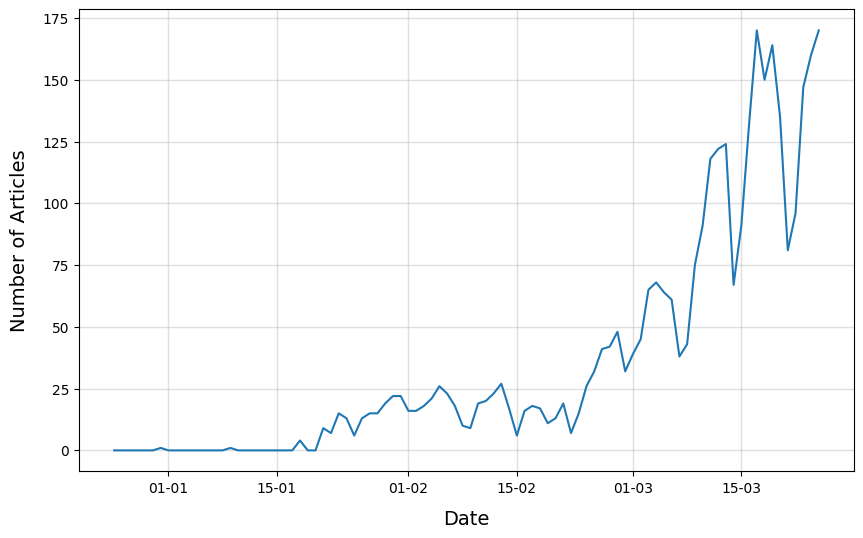

In [30]:
f = plt.figure(figsize=(10,6))
ax = f.gca()


formatter = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatter)
# locator = mdates.DayLocator()
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())

plt.xlabel('Date', labelpad=10, fontsize=14)
plt.ylabel('Number of Articles', labelpad=10, fontsize=14)

plt.plot(dates, df_articles["Count"])
plt.grid(linewidth=1, alpha=0.4)
plt.show()

f.savefig("num_articles_by_date.pdf", bbox_inches='tight')


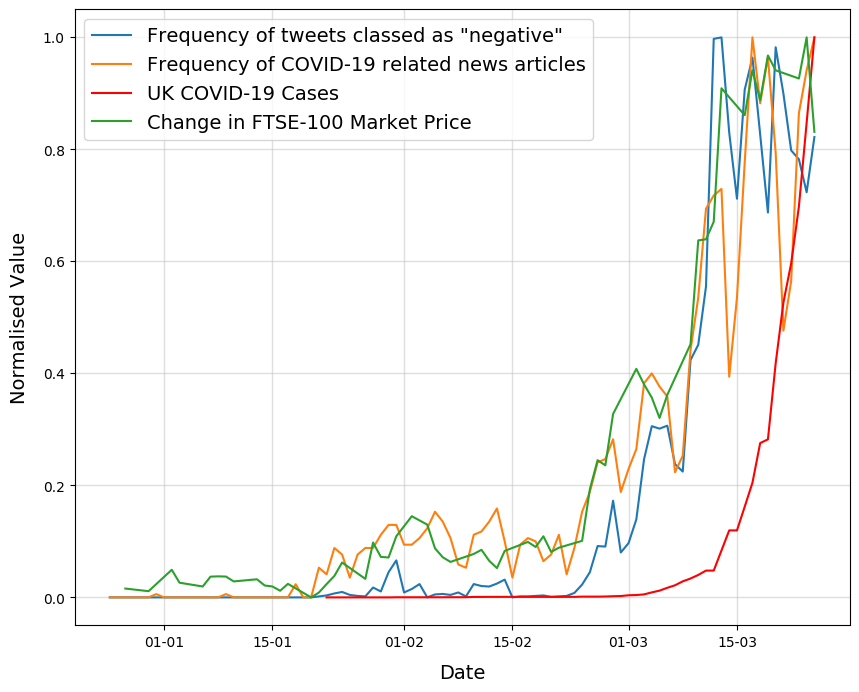

In [38]:
f = plt.figure(figsize=(10,8))
ax = f.gca()

df_ftse["Date"] = pd.to_datetime(df_ftse["Date"])
df_cases["Date"] = pd.to_datetime(df_cases["Date"])
df_articles["Date"] = pd.to_datetime(df_articles["Date"])

formatter = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Date', labelpad=10, fontsize=14)
plt.ylabel('Normalised Value', labelpad=10, fontsize=14)


plt_tweet = plt.plot(dates, df_tweets["Normalised Negative"])


# FTSE and cases have missing values in x axis. This is done to interpolate between the missing values (very hacky couldn't find any other way to do it)
plt_ftse_scatter = plt.scatter(df_ftse["Date"], df_ftse["Normalised Price"], marker='None')
ftse_x = []
for i in plt_ftse_scatter.get_offsets():
    ftse_x.append(i[0])
    
plt_cases_scatter = plt.scatter(df_cases["Date"], df_cases["Normalised"], linewidths=0.1, marker='None')
cases_x = []
for i in plt_cases_scatter.get_offsets():
    cases_x.append(i[0])

    
plt_articles = plt.plot(df_articles["Date"], df_articles["Normalised Count"])
plt_cases = plt.plot(cases_x, df_cases["Normalised"], color='red')
plt_ftse = plt.plot(ftse_x, df_ftse["Normalised Price"])


ax.legend(['Frequency of tweets classed as "negative"', 'Frequency of COVID-19 related news articles', 'UK COVID-19 Cases', 'Change in FTSE-100 Market Price'], prop={'size': 14})
plt.grid(linewidth=1, alpha=0.4)
plt.show()

f.savefig("correlation.pdf", bbox_inches='tight')